# OpenCV - Machine Learning

In [218]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## K-Nearest Neighbour

In [219]:
# Feature set containing (x,y) values of 25 known/training data
train_data = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)

print(responses.ravel())

[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0.]


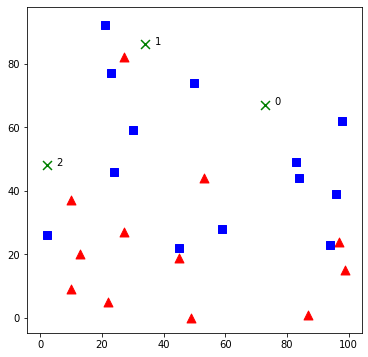

In [220]:
plt.figure(figsize=(6, 6))

# Take Red families and plot them
red = train_data[responses.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

# Take Blue families and plot them
blue = train_data[responses.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

newcomer = np.random.randint(0, 100, (3, 2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'x')

for i, txt in enumerate(range(3)):
    plt.annotate(txt, (newcomer[i,0] + 3, newcomer[i,1]))

plt.show()

In [221]:
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, responses)
retval, results, neighbours, distance = knn.findNearest(newcomer, 3)

print("retval: ", retval)
print("result:\n", results)
print("neighbours:\n", neighbours)
print("distance:\n", distance)

retval:  1.0
result:
 [[1.]
 [1.]
 [1.]]
neighbours:
 [[1. 1. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
distance:
 [[424. 578. 650.]
 [ 65. 202. 205.]
 [185. 484. 488.]]


## Support Vector Machines (SVM)

In [222]:
# Feature set containing (x,y) values of 25 known/training data
train_data = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# Labels each one either Red or Blue with numbers 0 and 1
responses = np.zeros((25, 1)).astype(np.int32)

for i in range(25):
    if train_data[i, 0] + train_data[i, 1] > 100:
        responses[i, 0] = 1

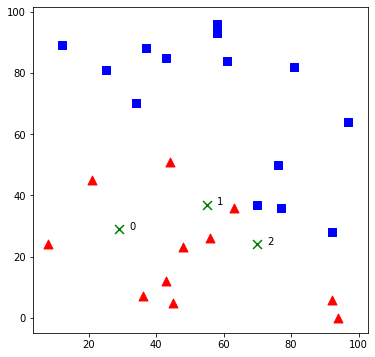

In [223]:
plt.figure(figsize=(6, 6))

# Take Red families and plot them
red = train_data[responses.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

# Take Blue families and plot them
blue = train_data[responses.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

newcomer = np.random.randint(0, 100, (3, 2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'x')

for i, txt in enumerate(range(3)):
    plt.annotate(txt, (newcomer[i,0] + 3, newcomer[i,1]))

plt.show()

In [224]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(train_data, cv2.ml.ROW_SAMPLE, responses)
_, results = svm.predict(newcomer)

print("result:\n", results)

result:
 [[0.]
 [0.]
 [0.]]


## K-Means Clustering

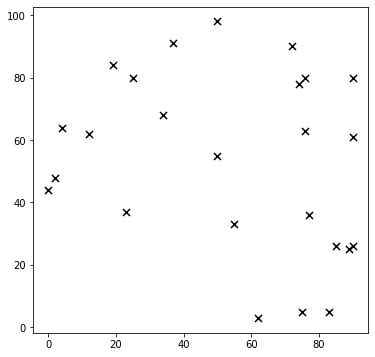

In [232]:
# Feature set containing (x,y) values of 25 known/training data
train_data = np.random.randint(0, 100, (25, 2)).astype(np.float32)
plt.figure(figsize=(6, 6))
plt.scatter(train_data[:,0], train_data[:,1], 50, 'k', 'x')
plt.show()

In [235]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness, labels, centers = cv2.kmeans(train_data, 5, None, criteria, 10, flags)

print("centers:\n", centers)

centers:
 [[80.14286  18.      ]
 [ 8.2      51.      ]
 [33.       84.200005]
 [52.5      44.      ]
 [79.66667  75.333336]]


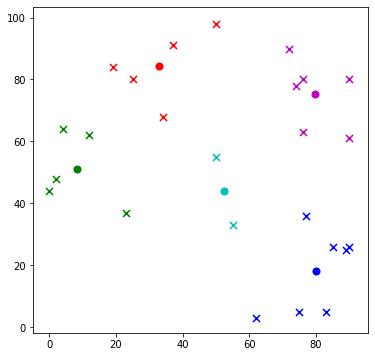

In [236]:
plt.figure(figsize=(6, 6))

for index, color_code in enumerate('bgrcmykw'):
    
    groups = train_data[labels.ravel() == index]
    plt.scatter(groups[:,0], groups[:,1], 50, color_code, 'x')

    if index < 5:
        plt.scatter(centers[index,0], centers[index,1], 50, color_code, 'o')

plt.show()

## Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_table_of_contents_ml/py_table_of_contents_ml.html
- https://docs.opencv.org/3.2.0/d5/d26/tutorial_py_knn_understanding.html